# Importing Libraries

In [6]:
import pandas as pd
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn import metrics

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating Dataframe and Converting it to .csv file

In [2]:
folder_path = 'train'
file_list = glob.glob(folder_path + "/*.txt")
main_dataframe = pd.DataFrame(pd.read_table(file_list[0]))
df = pd.DataFrame()
    
for i in range(0,len(file_list)):
    with open(file_list[i]) as f:
        lines = f.readlines()
        lines0 = [line.split()[0] for line in lines]
        lines1 = [line.split()[1:][-1] for line in lines]
        df1 = pd.DataFrame ([lines1[0:-1]], columns = lines0[0:-1])
        df = pd.concat([df, df1], ignore_index=True)
        
  
# creating a new csv file with
# the dataframe we created
df.to_csv('train_f.csv')

# Reading .csv file and storing it in dataframe amazon

In [8]:
amazon = pd.read_csv('train_f.csv')

# Data Overview - EDA

### Using basic function to check shape, not null value, statistic details like percentile, means and correlations

In [5]:
amazon.shape

(45593, 21)

In [6]:
amazon.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,...,11:45,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0
1,1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,...,19:50,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0
2,2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,...,8:45,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0
3,3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,...,18:10,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0
4,4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,...,13:45,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30.0


In [11]:
amazon.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,45593.0,22796.000000,13161.709748,0.000000,11398.000000,22796.000000,34194.000000,45592.000000
Delivery_person_Age,43739.0,29.567137,5.815155,15.000000,25.000000,30.000000,35.000000,50.000000
Delivery_person_Ratings,43685.0,4.633780,0.334716,1.000000,4.500000,4.700000,4.900000,6.000000
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,44600.0,0.744664,0.572473,0.000000,0.000000,1.000000,1.000000,3.000000
Time_taken,45593.0,26.294607,9.383806,10.000000,19.000000,26.000000,32.000000,54.000000


In [12]:
amazon.corr()

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken
Unnamed: 0,1.000000,-0.002659,0.002811,0.004992,-0.002155,0.004163,-0.001368,-0.003369,-0.003522,-0.005518
Delivery_person_Age,-0.002659,1.000000,-0.067939,-0.004532,-0.009347,0.002489,-0.000495,0.003308,0.115851,0.299474
Delivery_person_Ratings,0.002811,-0.067939,1.000000,-0.007792,-0.014203,-0.010318,-0.013552,0.034581,-0.117647,-0.338790
Restaurant_latitude,0.004992,-0.004532,-0.007792,1.000000,0.661784,0.866378,0.602713,-0.033551,0.008051,0.013981
Restaurant_longitude,-0.002155,-0.009347,-0.014203,0.661784,1.000000,0.632293,0.915026,-0.038744,0.004461,0.007821
Delivery_location_latitude,0.004163,0.002489,-0.010318,0.866378,0.632293,1.000000,0.690515,-0.001604,0.010277,0.014243
Delivery_location_longitude,-0.001368,-0.000495,-0.013552,0.602713,0.915026,0.690515,1.000000,-0.001960,0.005023,0.007625
Vehicle_condition,-0.003369,0.003308,0.034581,-0.033551,-0.038744,-0.001604,-0.001960,1.000000,-0.097270,-0.234398
multiple_deliveries,-0.003522,0.115851,-0.117647,0.008051,0.004461,0.010277,0.005023,-0.097270,1.000000,0.387051
Time_taken,-0.005518,0.299474,-0.338790,0.013981,0.007821,0.014243,0.007625,-0.234398,0.387051,1.000000


In [13]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   45593 non-null  int64  
 1   ID                           45593 non-null  object 
 2   Delivery_person_ID           45593 non-null  object 
 3   Delivery_person_Age          43739 non-null  float64
 4   Delivery_person_Ratings      43685 non-null  float64
 5   Restaurant_latitude          45593 non-null  float64
 6   Restaurant_longitude         45593 non-null  float64
 7   Delivery_location_latitude   45593 non-null  float64
 8   Delivery_location_longitude  45593 non-null  float64
 9   Order_Date                   45593 non-null  object 
 10  Time_Orderd                  43862 non-null  object 
 11  Time_Order_picked            45593 non-null  object 
 12  Weather                      44977 non-null  object 
 13  Road_traffic_den

### Using graphical visualization to check proportionality and other factor

##### From  the above plot it seems that age range from 20 - 40 are more in number than the other age

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Density'>

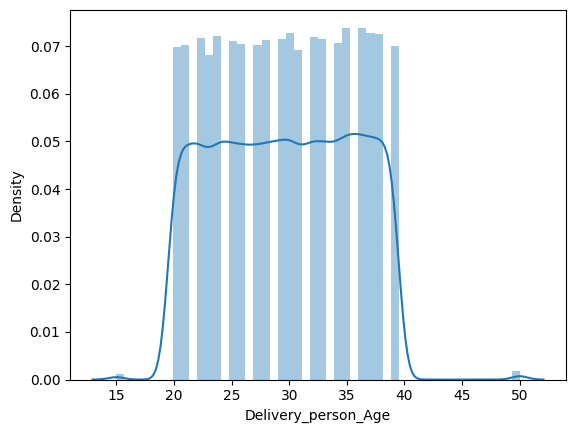

In [14]:
sns.distplot(amazon['Delivery_person_Age'])

##### From  the above plot it seems that the rating range from 4-5 are more in number than the other remaining rating,some value is above 5, not normally distributed

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_person_Ratings', ylabel='Density'>

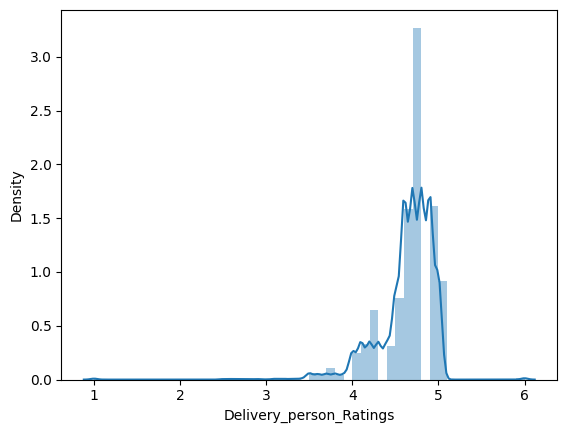

In [15]:
sns.distplot(amazon['Delivery_person_Ratings'])

##### From  the above plot it seems that the Road_traffic_density are ordered in [low,medium,high,jam], where low will take less time and jam will take more time

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


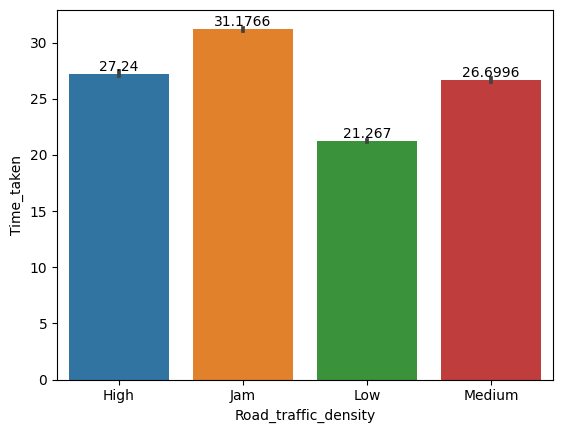

In [16]:
ax = sns.barplot(amazon['Road_traffic_density'],amazon['Time_taken'])
for i in ax.containers:
    ax.bar_label(i,)

##### From  the above plot it seems that the Type of order is independent on time taken

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


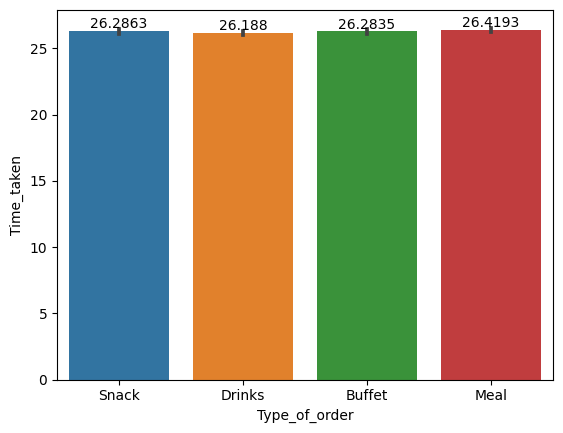

In [17]:
ax = sns.barplot(amazon['Type_of_order'],amazon['Time_taken'])
for i in ax.containers:
    ax.bar_label(i,)

##### From  the above plot it seems that the Festival are ordered in [No,Yes], where No will take less time and Yes will take more time

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


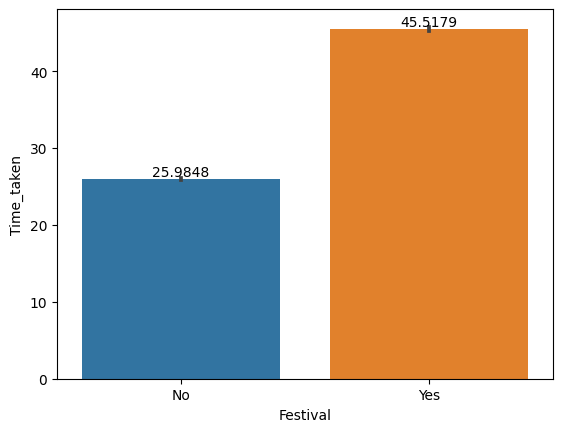

In [18]:
ax = sns.barplot(amazon['Festival'],amazon['Time_taken'])
for i in ax.containers:
    ax.bar_label(i,)

##### From  the above plot it seems that the multiple_deliveries are ordered in [0,1,2,3], where 0 will take less time and 3 will take more time

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


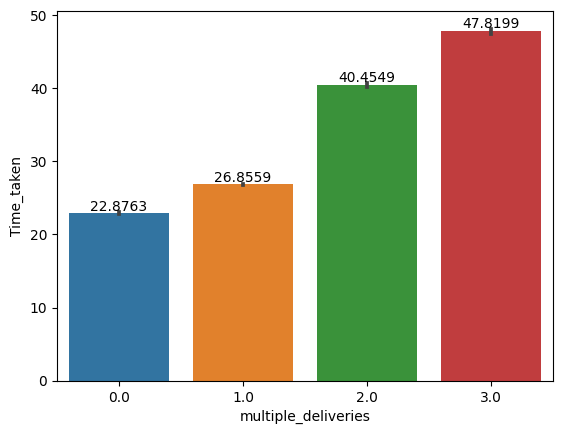

In [19]:
ax = sns.barplot(amazon['multiple_deliveries'],amazon['Time_taken'])
for i in ax.containers:
    ax.bar_label(i,)

# Data Preprocessing

#### Checking the Shape of Delivery_person_Ratings whose value is greater then 5 (Invalid)

In [26]:
amazon[(amazon['Delivery_person_Ratings']>5.0)].shape

(0, 21)

#### Replacing invalid value with NaN. 

In [9]:
amazon.loc[amazon['Delivery_person_Ratings']>5.0,'Delivery_person_Ratings'] = np.nan

In [10]:
amazon['Delivery_person_Ratings'].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, nan,
       3.8, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 3.4, 2.8,
       2.9, 3. ])

#### Some restaurant coordinate are invalid. that need to be replaces with nan in total distance

In [26]:
amazon[(amazon['Restaurant_latitude']<=0) | (amazon['Restaurant_longitude']<=0)].shape

(4071, 21)

#### Using geopy to find the distance between 2 coordinate

In [11]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ssaur\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [12]:
import geopy.distance

#### creating function to calculate distance between 2 coordinate, will return nan if coordinate is invalid

In [13]:
def calculate_dist_lat_long(la1,lo1,la2,lo2):
    coords_1 = (la1, lo1)
    coords_2 = (la2, lo2)
    if((la1>0.00) & (lo1>0.00)):
        result = geopy.distance.great_circle(coords_1, coords_2).km
        return result
    else:
        return float('NaN')

#### Applying Function to calculate total_distance

In [14]:
amazon['total_distance']=np.vectorize(calculate_dist_lat_long)(amazon['Restaurant_latitude'],amazon['Restaurant_longitude'],amazon['Delivery_location_latitude'],amazon['Delivery_location_longitude'])

### After Getting Total Distance

#### From the above value, we can find the speed using total distance and time taken. We are able to found that vehicle condition = 3 will taken more time as compared to 0, 1 and 2. Hence, the order is [0,1,2,3]

In [32]:
amazon.groupby('Vehicle_condition').sum()[['total_distance','Time_taken']]

,total_distance,Time_taken
Vehicle_condition,,
0,132790.883203,451354.0
1,133260.395899,366057.0
2,134117.248129,367663.0
3,3431.236385,13776.0


C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Speed')

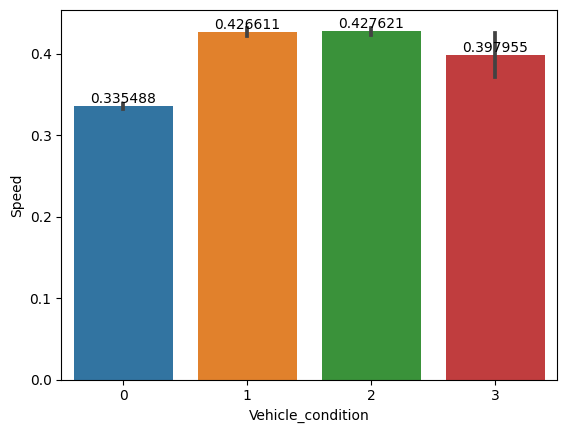

In [33]:
ax = sns.barplot(amazon['Vehicle_condition'],amazon['total_distance']/amazon['Time_taken'])
for i in ax.containers:
    ax.bar_label(i,)
ax.set_ylabel("Speed")

#### From the above value, we can find the speed using total distance and time taken. We are able to found that vehicle = bicycle will taken more time,then again less time will take by motorcycle,then electric scooter, then scooter. Hence, the order is [Scooter,electric scooter, motorcycle, bicycle]

In [34]:
amazon.groupby('Type_of_vehicle').sum()[['total_distance','Time_taken']]

,total_distance,Time_taken
Type_of_vehicle,,
bicycle,396.420662,1797.0
electric_scooter,33156.361170,93329.0
motorcycle,234580.959334,729756.0
scooter,135466.022450,373968.0


C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Speed')

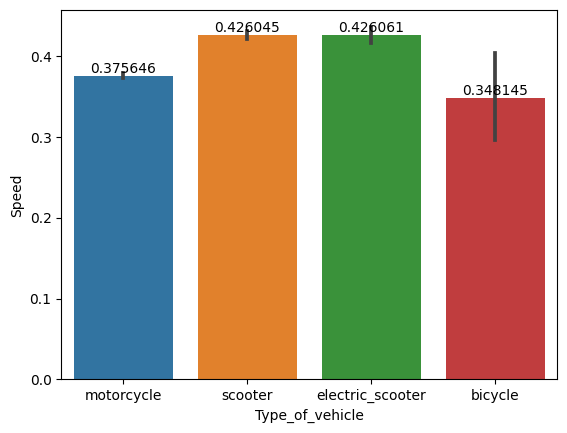

In [35]:
ax = sns.barplot(amazon['Type_of_vehicle'],amazon['total_distance']/amazon['Time_taken'])
for i in ax.containers:
    ax.bar_label(i,)
ax.set_ylabel("Speed")

#### From  the above plot it seems that the City are ordered in [Urban, Metropolitan,Semi Urban], where Urban will take less time and Semi Urban will take more time

In [36]:
amazon.groupby('City').sum()[['total_distance','Time_taken']]

,total_distance,Time_taken
City,,
Metropolitian,308406.942653,931258.0
Semi-Urban,1887.050235,8156.0
Urban,83205.798866,232966.0


C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Speed')

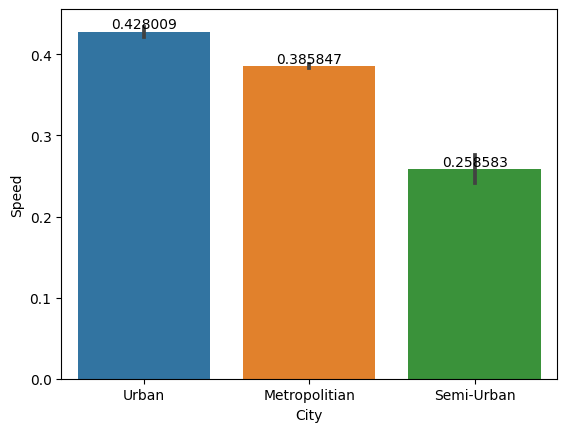

In [605]:
ax = sns.barplot(amazon['City'],amazon['total_distance']/amazon['Time_taken'])
for i in ax.containers:
    ax.bar_label(i,)
ax.set_ylabel("Speed")

#### From  the above plot it seems that the Weather are ordered in ['Sunny','Stormy','Windy','Sandstorms','Cloudy','Fog'], where sunny will  take less time, and fog will take more time

In [37]:
amazon.groupby('Weather').sum()[['total_distance','Time_taken']]

,total_distance,Time_taken
Weather,,
Cloudy,67283.765953,217921.0
Fog,68080.652227,221324.0
Sandstorms,66125.880122,193937.0
Stormy,67474.277699,196256.0
Sunny,64331.667474,159206.0
Windy,66162.586557,193854.0


C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Speed')

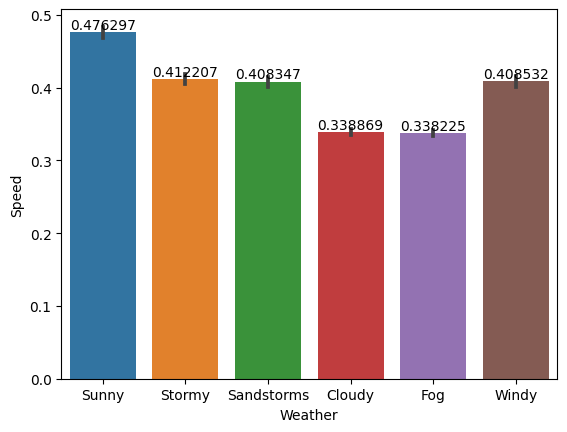

In [607]:
ax = sns.barplot(amazon['Weather'],amazon['total_distance']/amazon['Time_taken'])
for i in ax.containers:
    ax.bar_label(i,)
ax.set_ylabel("Speed")

#### Changing the datatype to int for time_taken

In [15]:
amazon['Time_taken'] = amazon['Time_taken'].astype(int)

#### Dropping the Independent columns like Unnamed: 0, Delivery_person_ID, ('Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude') which is already converted to total_distance, Type_of_order, ('Order_Date','Time_Orderd','Time_Order_picked') has no realtion with time taken to deliver

In [16]:
amazon.drop(columns=['Unnamed: 0','ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude','Type_of_order','Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Orderd','Time_Order_picked'],inplace=True)

In [44]:
amazon.drop(columns=['Delivery_person_Age','Delivery_person_Ratings'],inplace=True)

In [19]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37918 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      37918 non-null  float64
 1   Delivery_person_Ratings  37918 non-null  float64
 2   Weather                  37918 non-null  object 
 3   Road_traffic_density     37918 non-null  object 
 4   Vehicle_condition        37918 non-null  int64  
 5   Type_of_vehicle          37918 non-null  object 
 6   multiple_deliveries      37918 non-null  float64
 7   Festival                 37918 non-null  object 
 8   City                     37918 non-null  object 
 9   Time_taken               37918 non-null  int32  
 10  total_distance           37918 non-null  float64
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 3.3+ MB


In [18]:
amazon = amazon.dropna()

In [15]:
amazon

,Delivery_person_Age,Delivery_person_Ratings,Weather,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,37.0,4.9,Sunny,High,2,motorcycle,0.0,No,Urban,24
1,34.0,4.5,Stormy,Jam,2,scooter,1.0,No,Metropolitian,33
2,23.0,4.4,Sandstorms,Low,0,motorcycle,1.0,No,Urban,26
3,38.0,4.7,Sunny,Medium,0,motorcycle,1.0,No,Metropolitian,21
4,32.0,4.6,Cloudy,High,1,scooter,1.0,No,Metropolitian,30
...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,Windy,High,1,motorcycle,0.0,No,Metropolitian,32
45589,21.0,4.6,Windy,Jam,0,motorcycle,1.0,No,Metropolitian,36
45590,30.0,4.9,Cloudy,Low,1,scooter,0.0,No,Metropolitian,16
45591,20.0,4.7,Cloudy,High,0,motorcycle,1.0,No,Metropolitian,26


In [20]:
oe = OrdinalEncoder(categories=[[0,1,2,3],[0.0,1.0,2.0,3.0],['Low', 'Medium','High','Jam'],['Sunny','Stormy','Windy','Sandstorms','Cloudy','Fog'],['scooter','electric_scooter','motorcycle','bicycle'],['Urban','Metropolitian','Semi-Urban'],['No','Yes']])

In [21]:
amazon[['Vehicle_condition','multiple_deliveries','Road_traffic_density','Weather','Type_of_vehicle','City','Festival']] = oe.fit_transform(amazon[['Vehicle_condition','multiple_deliveries','Road_traffic_density','Weather','Type_of_vehicle','City','Festival']])

In [22]:
X = amazon.drop(columns=['Time_taken'])
y = amazon['Time_taken']

In [260]:
X

,Delivery_person_Age,Delivery_person_Ratings,Weather,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,total_distance
0,37.0,4.9,0.0,2.0,2.0,2.0,0.0,0.0,0.0,3.025154
1,34.0,4.5,1.0,3.0,2.0,0.0,1.0,0.0,1.0,20.183558
2,23.0,4.4,3.0,0.0,0.0,2.0,1.0,0.0,0.0,1.552760
3,38.0,4.7,0.0,1.0,0.0,2.0,1.0,0.0,1.0,7.790412
4,32.0,4.6,4.0,2.0,1.0,0.0,1.0,0.0,1.0,6.210147
...,...,...,...,...,...,...,...,...,...,...
45587,35.0,4.2,2.0,3.0,2.0,2.0,1.0,0.0,1.0,16.600296
45588,30.0,4.8,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.489848
45590,30.0,4.9,4.0,0.0,1.0,0.0,0.0,0.0,1.0,4.657202
45591,20.0,4.7,4.0,2.0,0.0,2.0,1.0,0.0,1.0,6.232402


In [227]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Splitting The Data into train and test

#### Time_taken column as target column, remaining column are input

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.25, random_state=537)

#### 75% of data are in X_train,y_train

In [229]:
X_train.shape

(28438, 10)

In [230]:
y_train

24224    40
18104    15
20710    43
6439     29
36737    43
         ..
29097    28
35245    38
38410    42
21319    34
11216    35
Name: Time_taken, Length: 28438, dtype: int32

In [255]:
X_train

,Delivery_person_Age,Delivery_person_Ratings,Weather,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,total_distance
24224,36.0,4.4,5.0,1.0,1.0,2.0,0.0,0.0,1.0,16.720620
18104,31.0,4.6,0.0,3.0,2.0,0.0,0.0,0.0,0.0,13.735973
20710,33.0,4.4,3.0,3.0,0.0,2.0,0.0,1.0,1.0,13.829293
6439,34.0,4.8,1.0,0.0,1.0,2.0,1.0,0.0,0.0,10.868854
36737,34.0,4.4,5.0,3.0,2.0,0.0,0.0,1.0,1.0,16.601432
...,...,...,...,...,...,...,...,...,...,...
29097,30.0,4.9,1.0,0.0,1.0,0.0,1.0,0.0,1.0,9.315739
35245,31.0,4.4,2.0,3.0,1.0,2.0,1.0,0.0,1.0,12.100174
38410,35.0,4.1,1.0,1.0,0.0,2.0,2.0,0.0,1.0,10.586500
21319,25.0,4.1,3.0,3.0,0.0,2.0,1.0,0.0,1.0,4.469318


#### 20% of data are in X_test,y_test

In [232]:
X_test.shape

(9480, 10)

In [233]:
y_test

1405     20
21152    39
40870    19
32632    25
42155    40
         ..
16381    12
29145    26
30923    27
13801    18
14623    17
Name: Time_taken, Length: 9480, dtype: int32

## Multiple Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression  
lin_regs= LinearRegression()  
lin_regs.fit(X_train,y_train)
y_pred1 = lin_regs.predict(X_test)

In [25]:
metrics.r2_score(y_test,y_pred1)

0.5886823077911767

## Polynomial Linear Regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 4)  
x_poly= poly_regs.fit_transform(X_train)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y_train)  

LinearRegression()

In [27]:
y_pred2 = lin_reg_2.predict(poly_regs.fit_transform(X_test))

In [28]:
metrics.r2_score(y_test,y_pred2)

0.7529649470841453

## Support Vector Machine

In [29]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)


SVR()

In [31]:
y_pred3 = regressor.predict(X_test)

In [32]:
metrics.r2_score(y_test,y_pred3)

0.5888273941160429

# Column Transformer

#### trf1 - Simple Imputer

In [73]:
#1st Imputation Transformer
trf1 = ColumnTransformer([
        ('impute_weather',SimpleImputer(strategy='most_frequent'),[0]),
        ('impute_road_traffic_density',SimpleImputer(strategy='most_frequent'),[1]),
        ('impute_multiple_deliveries',SimpleImputer(strategy='most_frequent'),[4]),
        ('impute_festival',SimpleImputer(strategy='most_frequent'),[5]),
        ('impute_city',SimpleImputer(strategy='most_frequent'),[6]),
        ('impute_total_distance',SimpleImputer(),[7])
    ],remainder='passthrough')

In [74]:
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_weather',
                                 SimpleImputer(strategy='most_frequent'), [0]),
                                ('impute_road_traffic_density',
                                 SimpleImputer(strategy='most_frequent'), [1]),
                                ('impute_multiple_deliveries',
                                 SimpleImputer(strategy='most_frequent'), [4]),
                                ('impute_festival',
                                 SimpleImputer(strategy='most_frequent'), [5]),
                                ('impute_city',
                                 SimpleImputer(strategy='most_frequent'), [6]),
                                ('impute_total_distance', SimpleImputer(),
                                 [7])])

#### trf2 - Ordinal Encoder

In [75]:
oe = OrdinalEncoder(categories=[[0,1,2,3],[0.0,1.0,2.0,3.0],['Low', 'Medium','High','Jam'],['Sunny','Stormy','Windy','Sandstorms','Cloudy','Fog'],['scooter','electric_scooter','motorcycle','bicycle'],['Urban','Metropolitian','Semi-Urban'],['No','Yes']])

In [76]:
oe

OrdinalEncoder(categories=[[0, 1, 2, 3], [0.0, 1.0, 2.0, 3.0],
                           ['Low', 'Medium', 'High', 'Jam'],
                           ['Sunny', 'Stormy', 'Windy', 'Sandstorms', 'Cloudy',
                            'Fog'],
                           ['scooter', 'electric_scooter', 'motorcycle',
                            'bicycle'],
                           ['Urban', 'Metropolitian', 'Semi-Urban'],
                           ['No', 'Yes']])

In [77]:
#2nd OrdinalEncoder
trf2 = ColumnTransformer([
    ('ord_enco',oe,[6,2,1,0,7,4,3])], remainder='passthrough')

In [78]:
trf2

ColumnTransformer(remainder='passthrough',
                  transformers=[('ord_enco',
                                 OrdinalEncoder(categories=[[0, 1, 2, 3],
                                                            [0.0, 1.0, 2.0,
                                                             3.0],
                                                            ['Low', 'Medium',
                                                             'High', 'Jam'],
                                                            ['Sunny', 'Stormy',
                                                             'Windy',
                                                             'Sandstorms',
                                                             'Cloudy', 'Fog'],
                                                            ['scooter',
                                                             'electric_scooter',
                                                             'motorcycle',
                                                             'bicycle'],
                                                            ['Urban',
                                                             'Metropolitian',
                                                             'Semi-Urban'],
                                                            ['No', 'Yes']]),
                                 [6, 2, 1, 0, 7, 4, 3])])

#### trf3 - Min Max Scaling

In [79]:
#3rd Scaling
trf3 = ColumnTransformer([
    ('scale_1', MinMaxScaler(), slice(0,8))
])

In [80]:
trf3

ColumnTransformer(transformers=[('scale_1', MinMaxScaler(), slice(0, 8, None))])

#### trf4 - Model Selection - Linear Regression

In [93]:
#4th Model
from sklearn.linear_model import LinearRegression
trf4 = LinearRegression()

In [82]:
trf4

LinearRegression()

#### Pipeline - fitting data 

In [83]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4)
    
])

In [84]:
#fit data
pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_weather',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0]),
                                                 ('impute_road_traffic_density',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [1]),
                                                 ('impute_multiple_deliveries',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4]),
                                                 ('impute_festival',
                                                  SimpleImputer(strategy='most_frequent...
                                                                              2,
                                                                              3],
                                                                             [0.0,
                                                                              1.0,
                                                                              2.0,
                                                                              3.0],
                                                                             ['Low',
                                                                              'Medium',
                                                                              'High',
                                                                              'Jam'],
                                                                             ['Sunny',
                                                                              'Stormy',
                                                                              'Windy',
                                                                              'Sandstorms',
                                                                              'Cloudy',
                                                                              'Fog'],
                                                                             ['scooter',
                                                                              'electric_scooter',
                                                                              'motorcycle',
                                                                              'bicycle'],
                                                                             ['Urban',
                                                                              'Metropolitian',
                                                                              'Semi-Urban'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  [6, 2, 1, 0, 7, 4, 3])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale_1', MinMaxScaler(),
                                                  slice(0, 8, None))])),
                ('trf4', LinearRegression())])

# Predicting

In [85]:
y_pred = pipe.predict(X_test)

In [86]:
y_pred

array([23.73253842, 25.04447516, 21.35537237, ..., 34.08800886,
       40.38049751, 31.2282092 ])

In [87]:
y_test

1923     26
18248    24
44480    26
42133    12
42773    43
         ..
21891    29
34242    25
42839    30
22830    49
21328    38
Name: Time_taken, Length: 9744, dtype: int32

# R2 Score

In [88]:
metrics.r2_score(y_test,y_pred)

0.45401904414185645

### Line Plot between y_test and y_pred

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time_taken'>

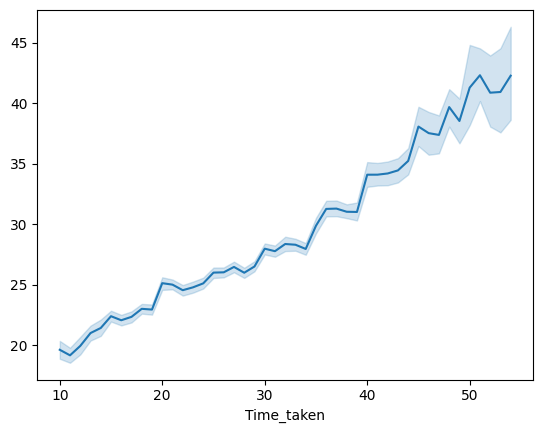

In [89]:
sns.lineplot(y_test,y_pred)

### Dist Plot between y_test and y_pred

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time_taken', ylabel='Density'>

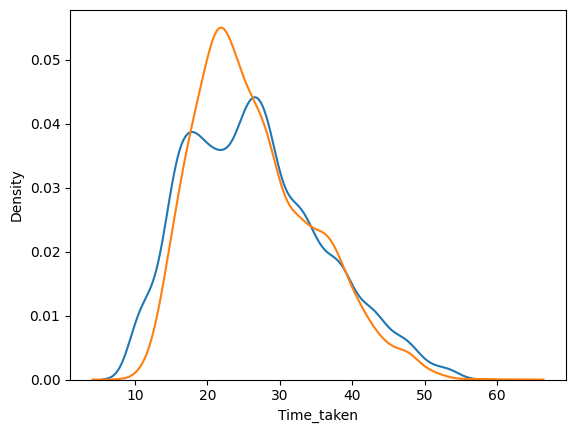

In [259]:
sns.distplot(y_test,hist=False)
sns.distplot(y_pred2,hist=False)